<a href="https://colab.research.google.com/github/priyanka36/MLProblems/blob/main/TimeSeriesUpskilling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"priyankapaudel","key":"4176ab331c3acaa8e041871ed049a532"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-03 07:25:55          16824  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          10184  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4722  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3715  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
! kaggle competitions download -c rossmann-store-sales

  0% 0.00/192k [00:00<?, ?B/s]
100% 192k/192k [00:00<00:00, 60.5MB/s]
  0% 0.00/310k [00:00<?, ?B/s]
100% 310k/310k [00:00<00:00, 92.9MB/s]
  0% 0.00/6.71M [00:00<?, ?B/s]
100% 6.71M/6.71M [00:00<00:00, 61.8MB/s]
  0% 0.00/44.0k [00:00<?, ?B/s]
100% 44.0k/44.0k [00:00<00:00, 64.4MB/s]


In [ ]:
!unzip test.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                


In [ ]:
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
sample_submission_df = pd.read_csv('/content/sample_submission.csv')
store_df = pd.read_csv("/content/store.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [ ]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
sample_submission_df.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [ ]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
test_df['Open']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
41083    1.0
41084    1.0
41085    1.0
41086    1.0
41087    1.0
Name: Open, Length: 41088, dtype: float64

In [ ]:
test_df['Open'].isnull().sum()

11

In [ ]:
train_df['Open'].isna().sum()

0

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
train_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
inner_join_df=store_df.merge(train_df,on=["Store"],how="inner")
inner_join_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [ ]:
outer_df=store_df.merge(train_df,on=["Store"],how="outer")
outer_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [ ]:
inner_join_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1014567 non-null  float64
 4   CompetitionOpenSinceMonth  693861 non-null   float64
 5   CompetitionOpenSinceYear   693861 non-null   float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            509178 non-null   float64
 8   Promo2SinceYear            509178 non-null   float64
 9   PromoInterval              509178 non-null   object 
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  object 
 12  Sales                      1017209 non-null  int64  
 13  Customers   

In [ ]:
outer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1014567 non-null  float64
 4   CompetitionOpenSinceMonth  693861 non-null   float64
 5   CompetitionOpenSinceYear   693861 non-null   float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            509178 non-null   float64
 8   Promo2SinceYear            509178 non-null   float64
 9   PromoInterval              509178 non-null   object 
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  object 
 12  Sales                      1017209 non-null  int64  
 13  Customers   

In [ ]:
inner_join_df.shape

(1017209, 18)

In [ ]:
inner_join_df.isna().sum()

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
dtype: int64

In [ ]:
inner_join_df.shape

(1017209, 18)

In [ ]:
df = inner_join_df.drop(columns=["Promo2SinceWeek","Promo2SinceYear","PromoInterval"])

In [ ]:
df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,NaN,NaN,1,6,2013-01-05,4771,339,1,0,0,1
1017205,1115,d,c,5350.0,NaN,NaN,1,5,2013-01-04,4540,326,1,0,0,1
1017206,1115,d,c,5350.0,NaN,NaN,1,4,2013-01-03,4297,300,1,0,0,1
1017207,1115,d,c,5350.0,NaN,NaN,1,3,2013-01-02,3697,305,1,0,0,1


In [ ]:
df.isna().sum()

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
dtype: int64

In [ ]:
(df.CompetitionOpenSinceYear.mode()[0])

2013.0

In [ ]:
df.CompetitionOpenSinceYear.fillna(df.CompetitionOpenSinceYear.mode()[0],inplace = True)

In [ ]:
df.CompetitionOpenSinceYear.isna().sum()

0

In [ ]:
df.isna().sum()

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear          0
Promo2                            0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
dtype: int64

In [ ]:
df.CompetitionOpenSinceMonth.mode()

0    9.0
dtype: float64

In [ ]:
df.CompetitionOpenSinceMonth.fillna(df.CompetitionOpenSinceMonth.mode()[0],inplace=True)

In [ ]:
df.isna().sum()

Store                           0
StoreType                       0
Assortment                      0
CompetitionDistance          2642
CompetitionOpenSinceMonth       0
CompetitionOpenSinceYear        0
Promo2                          0
DayOfWeek                       0
Date                            0
Sales                           0
Customers                       0
Open                            0
Promo                           0
StateHoliday                    0
SchoolHoliday                   0
dtype: int64

In [ ]:
df.CompetitionOpenSinceMonth.dtype

dtype('float64')

In [ ]:
plt.figure(figsize=(5,10))

<Figure size 360x720 with 0 Axes>

<Figure size 360x720 with 0 Axes>

In [ ]:
import seaborn as sns 
sns.set(style="whitegrid")


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


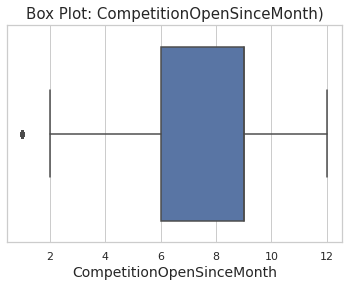

In [ ]:
plt.title('Box Plot: CompetitionOpenSinceMonth)', fontsize=15)
sns.boxplot(df.CompetitionOpenSinceMonth)
plt.xlabel('CompetitionOpenSinceMonth', fontsize=14)
plt.show()

In [ ]:
df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


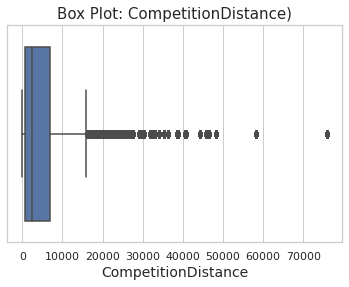

In [ ]:
plt.title('Box Plot: CompetitionDistance)', fontsize=15)
sns.boxplot(df.CompetitionDistance)
plt.xlabel('CompetitionDistance', fontsize=14)
plt.show()


In [ ]:
df.Assortment.dtypes

dtype('O')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


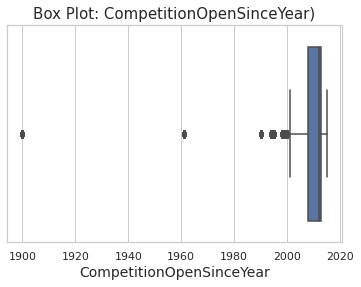

In [ ]:
plt.title('Box Plot: CompetitionOpenSinceYear)', fontsize=15)
sns.boxplot(df.CompetitionOpenSinceYear)
plt.xlabel('CompetitionOpenSinceYear', fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


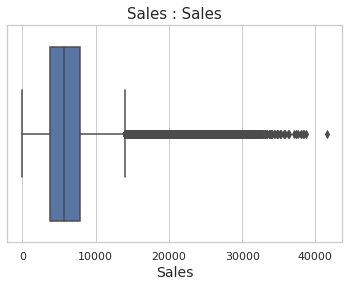

In [ ]:
plt.title('Sales : Sales',fontsize =15)
sns.boxplot(df.Sales)
plt.xlabel('Sales',fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


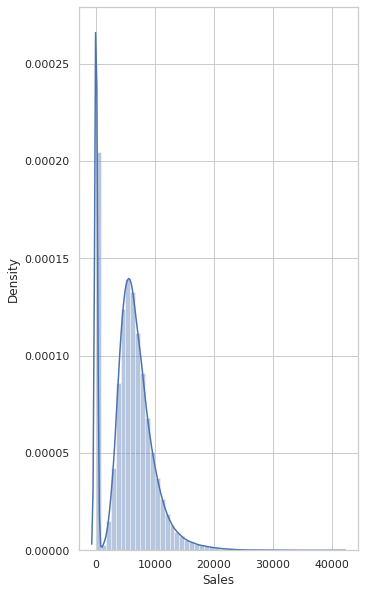

In [ ]:
plt.figure(figsize=(5,10))
sns.set(style="whitegrid")
sns.distplot(df["Sales"])

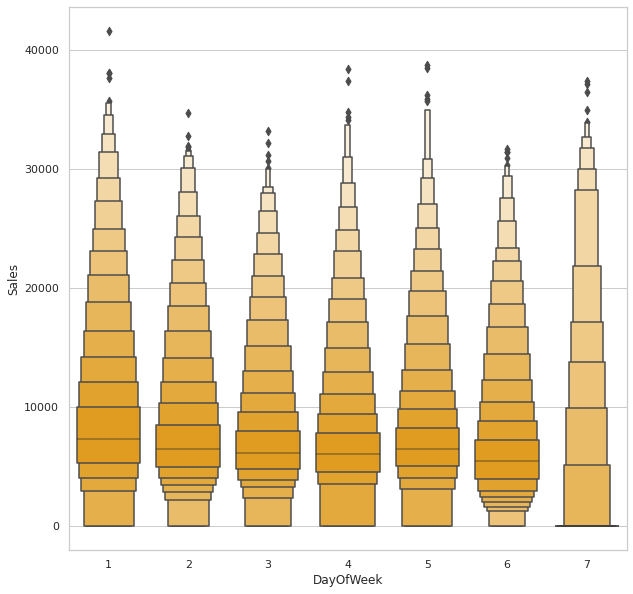

In [ ]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
sns.boxenplot(data=df,scale="linear",x="DayOfWeek",y="Sales",color="orange")

In [ ]:
df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
df["Date"] = pd.to_datetime(df['Date'])

In [ ]:
df["Year"] = pd.DatetimeIndex(df['Date']).year

In [ ]:
df["Month"] = pd.DatetimeIndex(df['Date']).month

In [ ]:
df["Days"] = pd.DatetimeIndex(df['Date']).day

In [ ]:
df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Days
0,1,c,a,1270.0,9.0,2008.0,0,5,2015-07-31,5263,555,1,1,0,1,2015,7,31
1,1,c,a,1270.0,9.0,2008.0,0,4,2015-07-30,5020,546,1,1,0,1,2015,7,30
2,1,c,a,1270.0,9.0,2008.0,0,3,2015-07-29,4782,523,1,1,0,1,2015,7,29
3,1,c,a,1270.0,9.0,2008.0,0,2,2015-07-28,5011,560,1,1,0,1,2015,7,28
4,1,c,a,1270.0,9.0,2008.0,0,1,2015-07-27,6102,612,1,1,0,1,2015,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,9.0,2013.0,1,6,2013-01-05,4771,339,1,0,0,1,2013,1,5
1017205,1115,d,c,5350.0,9.0,2013.0,1,5,2013-01-04,4540,326,1,0,0,1,2013,1,4
1017206,1115,d,c,5350.0,9.0,2013.0,1,4,2013-01-03,4297,300,1,0,0,1,2013,1,3
1017207,1115,d,c,5350.0,9.0,2013.0,1,3,2013-01-02,3697,305,1,0,0,1,2013,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   StoreType                  1017209 non-null  object        
 2   Assortment                 1017209 non-null  object        
 3   CompetitionDistance        1014567 non-null  float64       
 4   CompetitionOpenSinceMonth  1017209 non-null  float64       
 5   CompetitionOpenSinceYear   1017209 non-null  float64       
 6   Promo2                     1017209 non-null  int64         
 7   DayOfWeek                  1017209 non-null  int64         
 8   Date                       1017209 non-null  datetime64[ns]
 9   Sales                      1017209 non-null  int64         
 10  Customers                  1017209 non-null  int64         
 11  Open                       1017209 no

In [ ]:
categorical_columns = list(df.select_dtypes(include="object"))
print(categorical_columns)

['StoreType', 'Assortment', 'StateHoliday']


In [ ]:
df.StoreType.unique()


array(['c', 'a', 'd', 'b'], dtype=object)

In [ ]:
df.Assortment.unique()


array(['a', 'c', 'b'], dtype=object)

In [ ]:
df.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df[["StoreType","Assortment"]] = enc.fit_transform(df[["StoreType","Assortment"]])

In [ ]:
enc.categories_

[array(['a', 'b', 'c', 'd'], dtype=object),
 array(['a', 'b', 'c'], dtype=object)]

In [ ]:
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Days
0,1,2.0,0.0,1270.0,9.0,2008.0,0,5,2015-07-31,5263,555,1,1,0,1,2015,7,31
1,1,2.0,0.0,1270.0,9.0,2008.0,0,4,2015-07-30,5020,546,1,1,0,1,2015,7,30
2,1,2.0,0.0,1270.0,9.0,2008.0,0,3,2015-07-29,4782,523,1,1,0,1,2015,7,29
3,1,2.0,0.0,1270.0,9.0,2008.0,0,2,2015-07-28,5011,560,1,1,0,1,2015,7,28
4,1,2.0,0.0,1270.0,9.0,2008.0,0,1,2015-07-27,6102,612,1,1,0,1,2015,7,27


In [ ]:
df["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [ ]:
df["StateHoliday"]=np.where(df["StateHoliday"]=="0",0,1)


In [ ]:
df["StateHoliday"]=df["StateHoliday"].astype(int)

In [ ]:
df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Days
0,1,2.0,0.0,1270.0,9.0,2008.0,0,5,2015-07-31,5263,555,1,1,0,1,2015,7,31
1,1,2.0,0.0,1270.0,9.0,2008.0,0,4,2015-07-30,5020,546,1,1,0,1,2015,7,30
2,1,2.0,0.0,1270.0,9.0,2008.0,0,3,2015-07-29,4782,523,1,1,0,1,2015,7,29
3,1,2.0,0.0,1270.0,9.0,2008.0,0,2,2015-07-28,5011,560,1,1,0,1,2015,7,28
4,1,2.0,0.0,1270.0,9.0,2008.0,0,1,2015-07-27,6102,612,1,1,0,1,2015,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,3.0,2.0,5350.0,9.0,2013.0,1,6,2013-01-05,4771,339,1,0,0,1,2013,1,5
1017205,1115,3.0,2.0,5350.0,9.0,2013.0,1,5,2013-01-04,4540,326,1,0,0,1,2013,1,4
1017206,1115,3.0,2.0,5350.0,9.0,2013.0,1,4,2013-01-03,4297,300,1,0,0,1,2013,1,3
1017207,1115,3.0,2.0,5350.0,9.0,2013.0,1,3,2013-01-02,3697,305,1,0,0,1,2013,1,2


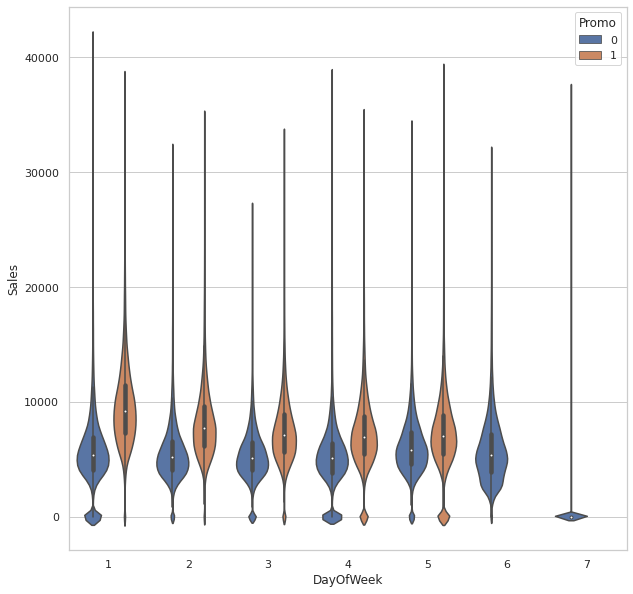

In [ ]:

plt.figure(figsize=(10,10))
sns.set(style = "whitegrid",color_codes=True)
sns.violinplot(x="DayOfWeek",y="Sales",hue="Promo",split=False, data=df)

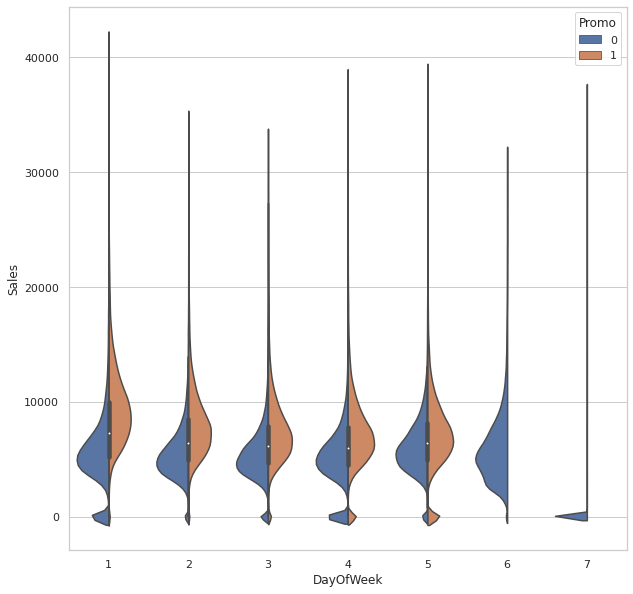

In [ ]:
plt.figure(figsize=(10,10))
sns.set(style = "whitegrid",color_codes=True)
sns.violinplot(x="DayOfWeek",y="Sales",hue="Promo",split=True, data=df)

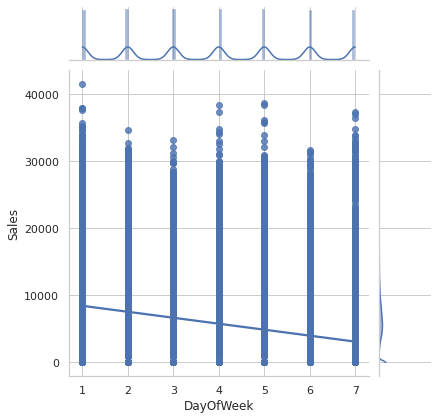

In [ ]:
sns.jointplot(x="DayOfWeek",y="Sales", data = df,kind = 'reg')

In [ ]:
df.StoreType.unique().tolist()

[2.0, 0.0, 3.0, 1.0]

In [ ]:
for i,j in enumerate(list(df.StoreType.unique())):
    
    k = len([df.groupby('StoreType')['Store'].unique()][0][i])
    print(f"Total number of '{j}' type stores is {k}")

Total number of '2.0' type stores is 602
Total number of '0.0' type stores is 17
Total number of '3.0' type stores is 148
Total number of '1.0' type stores is 348


In [ ]:
for i,j in enumerate(list(df.Assortment.unique())):
    
    if j == 'a':
        j='basic'
    elif j=='b':
        j='extra'
    else:
        j='extended'
    k = len([df.groupby('Assortment')['Store'].unique()][0][i])
    print(f"Total number of '{j}' assortment type is {k}") 

Total number of 'extended' assortment type is 593
Total number of 'extended' assortment type is 9
Total number of 'extended' assortment type is 513


In [ ]:
data1 = pd.DataFrame(df.groupby(['StoreType'])['Sales', 'Customers'].mean()).sort_values(by='StoreType')
data2 = pd.DataFrame(df.groupby(['Assortment'])['Sales', 'Customers'].mean()).sort_values(by='Assortment')
data3 = pd.DataFrame(df.groupby(['StoreType'])['Sales', 'Customers'].sum()).sort_values(by='StoreType')
data4 = pd.DataFrame(df.groupby(['Assortment'])['Sales', 'Customers'].sum()).sort_values(by='Assortment')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


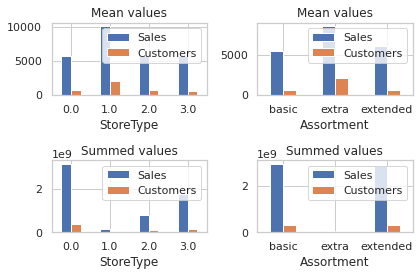

In [ ]:
ax1 = plt.subplot(221)
plt.title("Mean values")
data1.plot.bar(ax=ax1, rot=0)
ax2 = plt.subplot(222)
plt.title("Mean values")
data2.plot.bar(ax=ax2, rot=0)
ax2.set_xticklabels(['basic', 'extra', 'extended'])

ax1 = plt.subplot(223)
plt.title("Summed values")
data3.plot.bar(ax=ax1, rot=0)
ax2 = plt.subplot(224)
plt.title("Summed values")
data4.plot.bar(ax=ax2, rot=0)
ax2.set_xticklabels(['basic', 'extra', 'extended'])
plt.tight_layout()

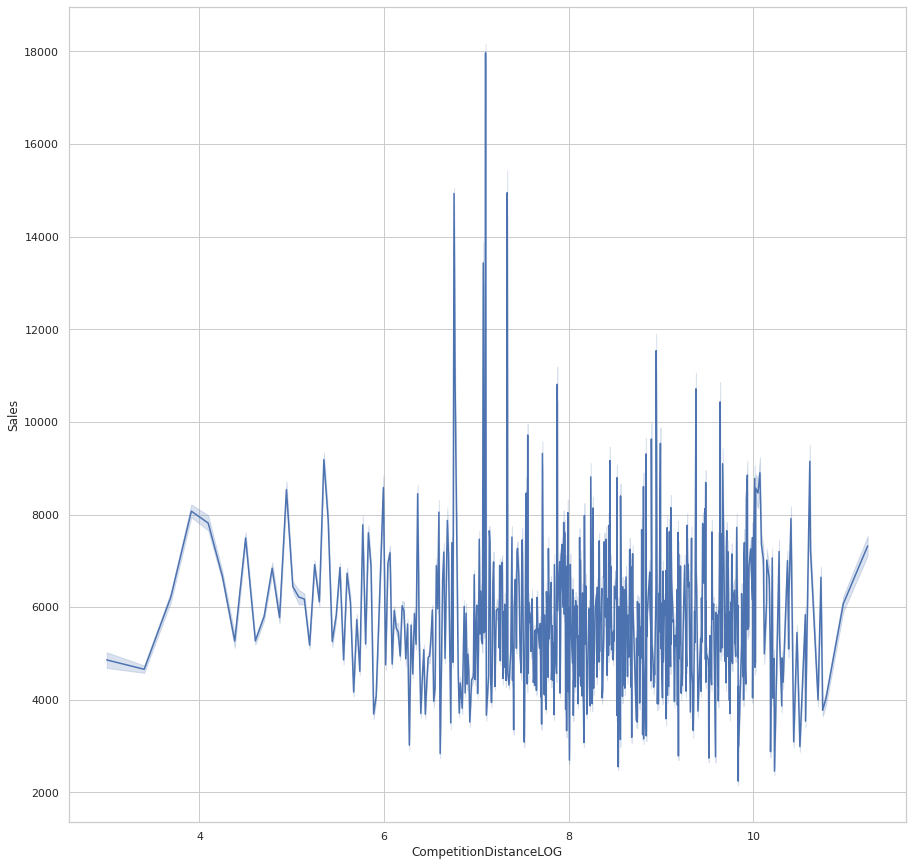

In [ ]:
plt.figure(figsize=(15,15))
sns.set(style="whitegrid")
df["CompetitionDistanceLOG"]=np.log(df["CompetitionDistance"])
sns.lineplot(x="CompetitionDistanceLOG", y="Sales", data=df)

In [ ]:
df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Days,CompetitionDistanceLOG
0,1,2.0,0.0,1270.0,9.0,2008.0,0,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,7.146772
1,1,2.0,0.0,1270.0,9.0,2008.0,0,4,2015-07-30,5020,546,1,1,0,1,2015,7,30,7.146772
2,1,2.0,0.0,1270.0,9.0,2008.0,0,3,2015-07-29,4782,523,1,1,0,1,2015,7,29,7.146772
3,1,2.0,0.0,1270.0,9.0,2008.0,0,2,2015-07-28,5011,560,1,1,0,1,2015,7,28,7.146772
4,1,2.0,0.0,1270.0,9.0,2008.0,0,1,2015-07-27,6102,612,1,1,0,1,2015,7,27,7.146772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,3.0,2.0,5350.0,9.0,2013.0,1,6,2013-01-05,4771,339,1,0,0,1,2013,1,5,8.584852
1017205,1115,3.0,2.0,5350.0,9.0,2013.0,1,5,2013-01-04,4540,326,1,0,0,1,2013,1,4,8.584852
1017206,1115,3.0,2.0,5350.0,9.0,2013.0,1,4,2013-01-03,4297,300,1,0,0,1,2013,1,3,8.584852
1017207,1115,3.0,2.0,5350.0,9.0,2013.0,1,3,2013-01-02,3697,305,1,0,0,1,2013,1,2,8.584852


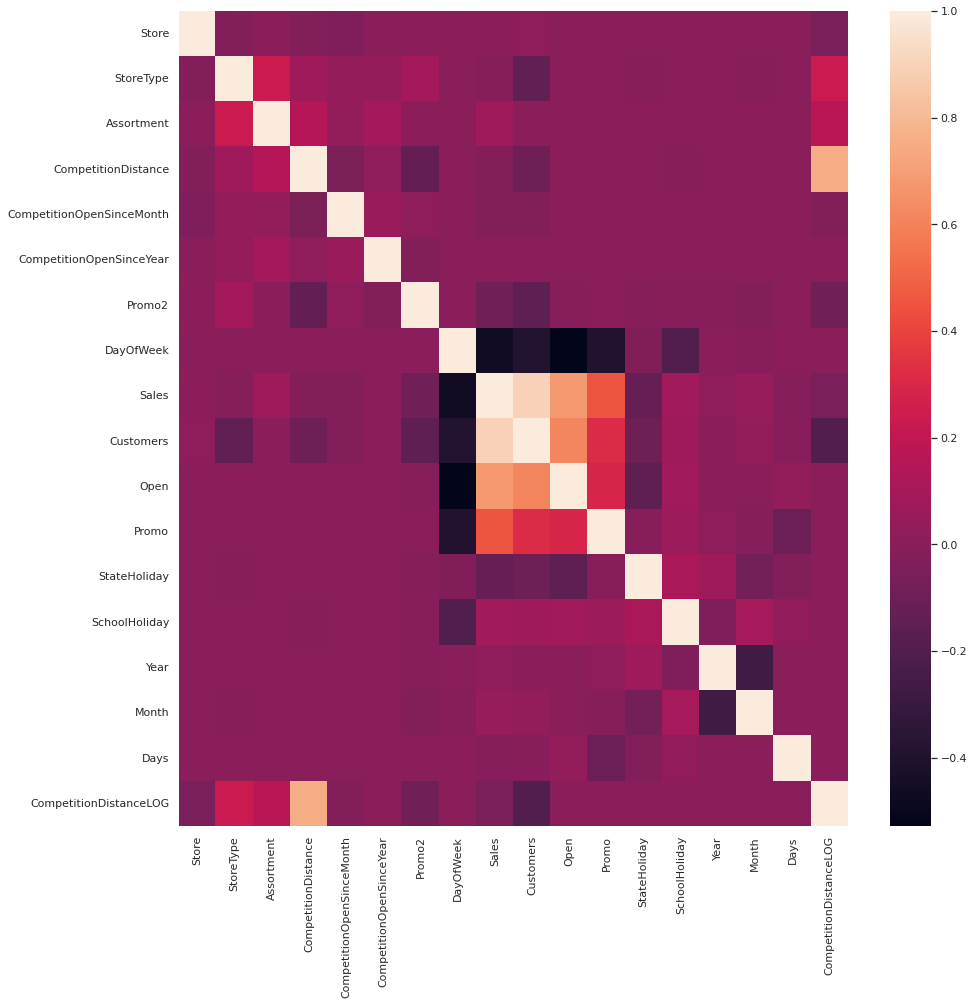

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap((df.corr()))

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing
from tqdm import tqdm_notebook
from itertools import product

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Days,CompetitionDistanceLOG
0,1,2.0,0.0,1270.0,9.0,2008.0,0,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,7.146772
1,1,2.0,0.0,1270.0,9.0,2008.0,0,4,2015-07-30,5020,546,1,1,0,1,2015,7,30,7.146772
2,1,2.0,0.0,1270.0,9.0,2008.0,0,3,2015-07-29,4782,523,1,1,0,1,2015,7,29,7.146772
3,1,2.0,0.0,1270.0,9.0,2008.0,0,2,2015-07-28,5011,560,1,1,0,1,2015,7,28,7.146772
4,1,2.0,0.0,1270.0,9.0,2008.0,0,1,2015-07-27,6102,612,1,1,0,1,2015,7,27,7.146772


In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Days',
       'CompetitionDistanceLOG'],
      dtype='object')

In [ ]:
df.shape

(1017209, 19)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df.isna().sum()

Store                           0
StoreType                       0
Assortment                      0
CompetitionDistance          2642
CompetitionOpenSinceMonth       0
CompetitionOpenSinceYear        0
Promo2                          0
DayOfWeek                       0
Date                            0
Sales                           0
Customers                       0
Open                            0
Promo                           0
StateHoliday                    0
SchoolHoliday                   0
Year                            0
Month                           0
Days                            0
CompetitionDistanceLOG       2642
dtype: int64

In [ ]:
df.CompetitionDistance.mode()

0    250.0
dtype: float64

In [ ]:
df.CompetitionDistance.fillna(df.CompetitionDistance.mode()[0],inplace = True)

In [ ]:
df.isna().sum()

Store                           0
StoreType                       0
Assortment                      0
CompetitionDistance             0
CompetitionOpenSinceMonth       0
CompetitionOpenSinceYear        0
Promo2                          0
DayOfWeek                       0
Date                            0
Sales                           0
Customers                       0
Open                            0
Promo                           0
StateHoliday                    0
SchoolHoliday                   0
Year                            0
Month                           0
Days                            0
CompetitionDistanceLOG       2642
dtype: int64

In [ ]:
df.CompetitionDistanceLOG.fillna(df.CompetitionDistanceLOG.mode()[0],inplace = True)

In [ ]:
df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Year                         0
Month                        0
Days                         0
CompetitionDistanceLOG       0
dtype: int64

In [ ]:
X_train=df[:int(df.shape[0]*80/100)].drop(columns=["Date","Sales","CompetitionOpenSinceMonth"])
Y_train=df[:int(df.shape[0]*80/100)]["Sales"]
X_test=df[int(df.shape[0]*80/100):].drop(columns=["Date","Sales","CompetitionOpenSinceMonth"])
Y_test=df[int(df.shape[0]*80/100):]["Sales"]


In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
linear_reg_model=LinearRegression()
linear_reg_model.fit(X_train,Y_train)

(813767, 16) (813767,) (203442, 16) (203442,)


LinearRegression()

In [ ]:
y_pred=linear_reg_model.predict(X_test)
pred_df=pd.DataFrame({'Predictions':y_pred,'Actual':Y_test})
pred_df=pred_df.reset_index(drop=True)
pred_df.head()

,Predictions,Actual
0,-1427.232787,0
1,4551.452692,5018
2,6482.394013,6220
3,6951.388600,7047
4,7459.329192,7367


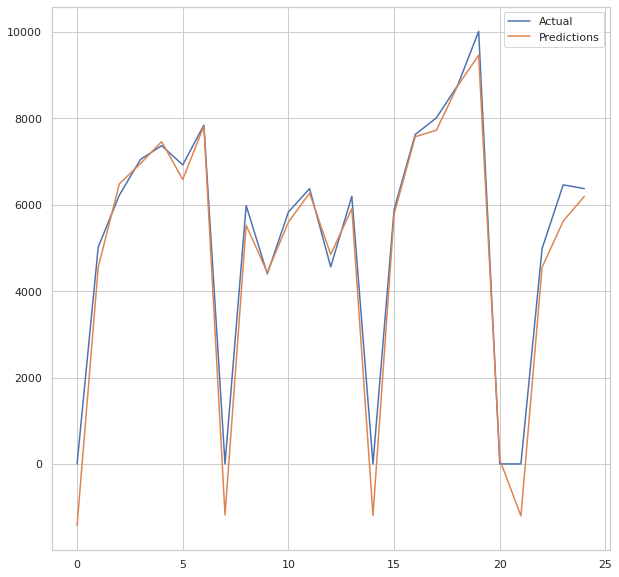

In [ ]:
plt.figure(figsize=(10,10))
pred_df["Actual"][:25,].plot.line()
pred_df["Predictions"][:25,].plot.line()
plt.legend()
plt.show()

In [ ]:
linear_reg_model.score(X_test,Y_test)

0.8611699194902912

In [ ]:
from sklearn.linear_model import Lasso
Lasso_reg_model = Lasso(alpha=2)
Lasso_reg_model.fit(X_train,Y_train)

Lasso(alpha=2)

In [ ]:
y_pred=Lasso_reg_model.predict(X_test)
pred_df=pd.DataFrame({'Predictions':y_pred,'Actual':Y_test})
pred_df=pred_df.reset_index(drop=True)
pred_df.head()

,Predictions,Actual
0,-1403.727844,0
1,4563.437928,5018
2,6488.384150,6220
3,6960.150398,7047
4,7470.928230,7367


In [ ]:
Lasso_reg_model.score(X_test,Y_test)

0.8612339563278206

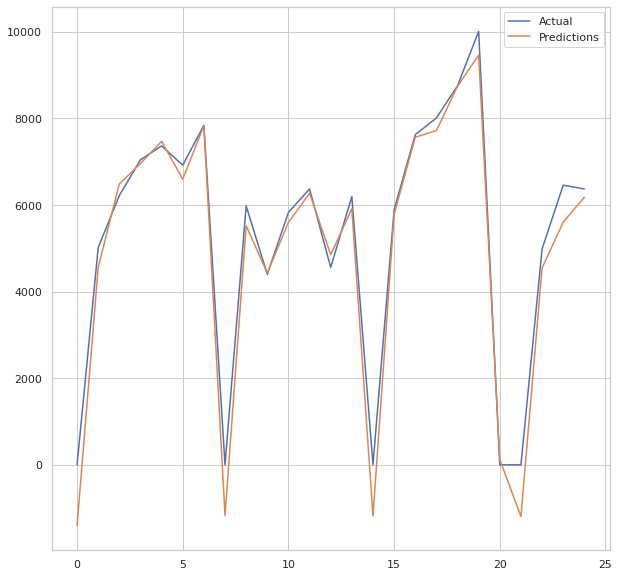

In [ ]:
plt.figure(figsize=(10,10))
pred_df["Actual"][:25,].plot.line()
pred_df["Predictions"][:25,].plot.line()
plt.legend()
plt.show()

In [ ]:
import lightgbm as lgb
base_lgb_model = lgb.LGBMRegressor(n_leaves=50,
                               n_estimators=700, 
                               max_depth=-1,  
                               learning_rate=0.3, #0.1
                               subsample=1,
                               colsample_bytree=0.8,
                               reg_alpha=0.1,
                               reg_lambda=1)

base_lgb_model.fit(X_train, Y_train)
y_pred=base_lgb_model.predict(X_test)
pred_df=pd.DataFrame({'Predictions':y_pred,'Actual':Y_test})
pred_df=pred_df.reset_index(drop=True)
pred_df.head()

,Predictions,Actual
0,-25.920347,0
1,5113.147584,5018
2,6033.889598,6220
3,6795.792579,7047
4,7324.932886,7367


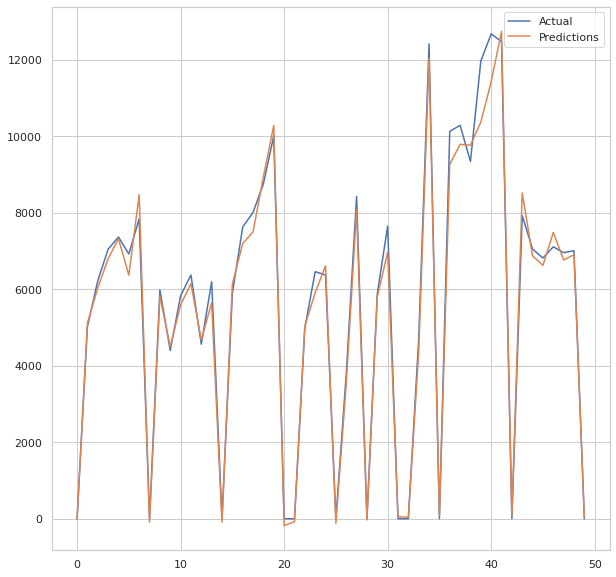

In [ ]:
plt.figure(figsize=(10,10))
pred_df["Actual"][:50,].plot.line()
pred_df["Predictions"][:50,].plot.line()
plt.legend()
plt.show()


In [ ]:
df.sample(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Days,CompetitionDistanceLOG
880313,966,0.0,0.0,760.0,2.0,2008.0,0,7,2014-08-10,0,0,0,0,1,0,2014,8,10,6.633318
422963,464,2.0,0.0,520.0,3.0,2009.0,0,1,2014-11-24,11757,1335,1,1,0,0,2014,11,24,6.253829
456439,501,0.0,2.0,1620.0,9.0,2006.0,0,7,2015-02-22,0,0,0,0,0,0,2015,2,22,7.390181


In [ ]:
features = ['Store','StoreType','Assortment','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Customers','Open','Promo']

In [ ]:
label = 'Sales'

ValueError: ignored

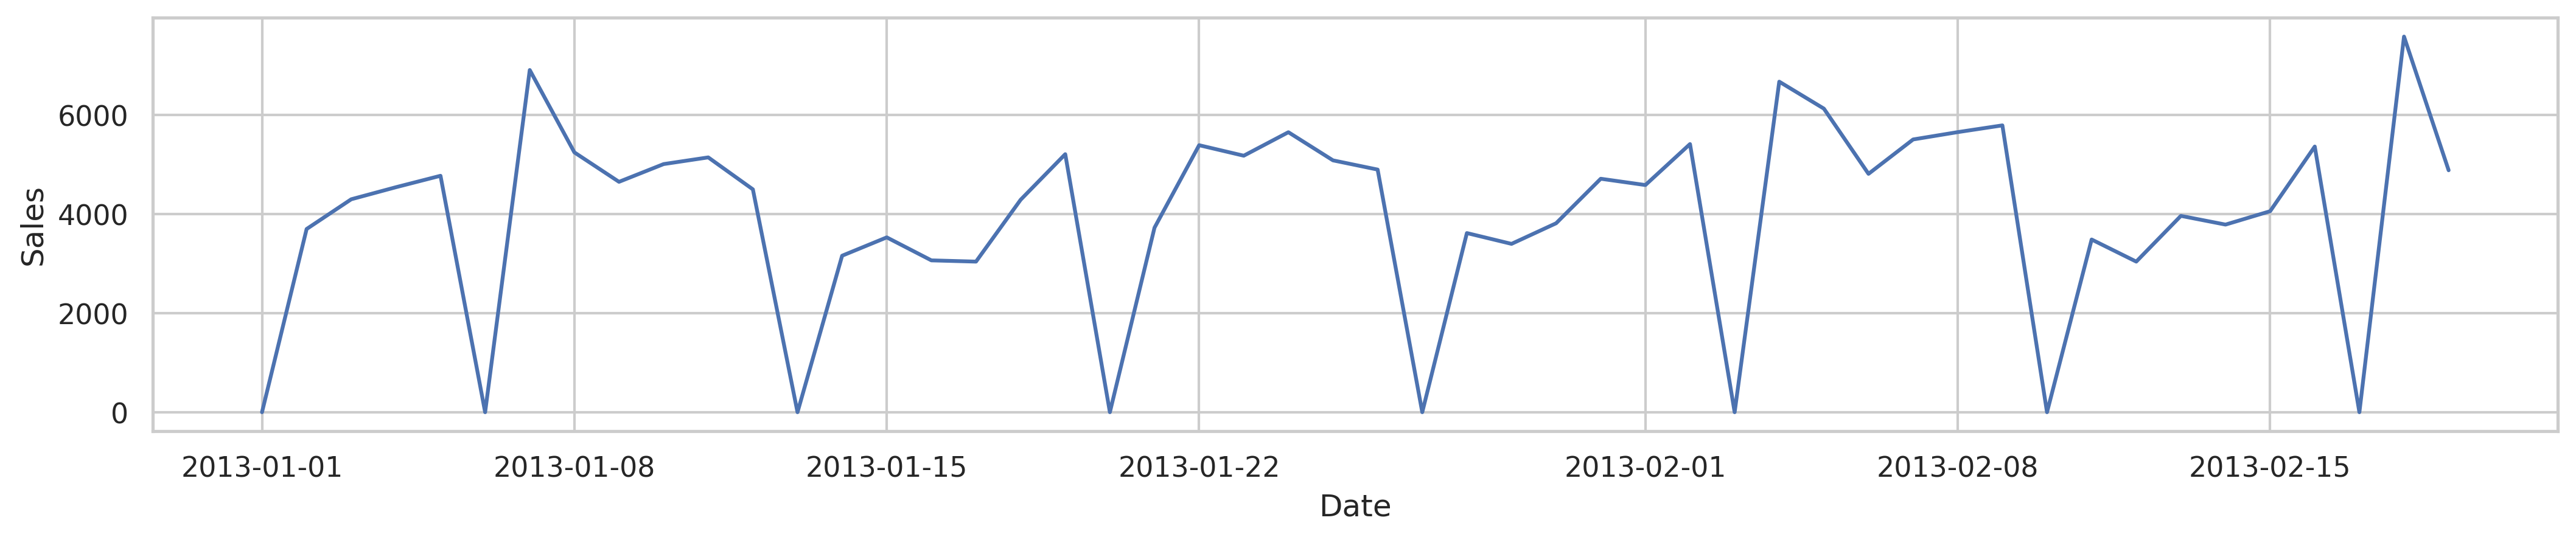

In [ ]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=df.tail(50), x='Date', y='Sales')
sns.lineplot(data=test_df, x='Date', y='Sales')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [ ]:
import random
time_features=df[["Year","Month", "Promo", "Open","Store","Sales","Date"]]
#Choose a random store
x=random.randint(1,1115)
print(x)
time_features=time_features.loc[time_features['Store'] == x]

In [ ]:
print(x)
time_features=time_features.loc[time_features['Store'] == x]

In [ ]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
sns.lineplot(x="Month", y="Sales", data=time_features.loc[time_features['Year'] == 2013])

In [ ]:
print(time_features.loc[time_features['Store'] == x])

In [ ]:
plt.figure(figsize=(15,15))
sns.set(style="whitegrid")
sns.lineplot(x="Month", y="Sales", data=time_features.loc[time_features['Year'] == 2015])

In [ ]:
import tensorflow as tf
import keras
import keras.backend as kb

In [ ]:
time_target=time_features["Sales"]
time_features=time_features.drop(columns=["Sales","Date"])

In [ ]:
X_train=time_features[:int(time_features.shape[0]*80/100)]
Y_train=time_target[:int(time_target.shape[0]*80/100)]
X_test=time_features[int(time_features.shape[0]*80/100):int(df.shape[0]*95/100)]
Y_test=time_target[int(time_target.shape[0]*80/100):int(df.shape[0]*95/100)]
X_val=time_features[int(time_features.shape[0]*95/100):]
Y_val=time_target[int(time_target.shape[0]*95/100):]

In [ ]:
time_model=keras.models.Sequential()
time_model.add(keras.layers.Embedding(input_dim=2500, output_dim=4, input_length=5))
time_model.add(keras.layers.LSTM(256, return_sequences=True))
time_model.add(keras.layers.LSTM(256, return_sequences=True))
time_model.add(keras.layers.Dense(64, activation="relu")) 
time_model.add(keras.layers.Dense(1))

In [ ]:
time_model.compile(optimizer="adam",metrics=["mean_absolute_error"],loss="mean_squared_error")

In [ ]:
hist=time_model.fit(X_train,Y_train,batch_size=50,epochs=30,validation_data=(X_val,Y_val))

In [ ]:
results=time_model.evaluate(X_test,Y_test)
for i in range(len(time_model.metrics_names)):
  print(time_model.metrics_names[i],":",results[i])

In [ ]:
plt.plot(hist.history['loss'][:30])
plt.plot(hist.history['val_loss'][:30])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df

In [ ]:
df['week'] = pd.DatetimeIndex(df['Date']).week

# Weekly sales Analysis 

In [ ]:
rosemangrp = df.groupby(['DayOfWeek'],as_index = False)
rosemangrp.groups
rosemangp = rosemangrp.agg({'Sales':np.mean})
rosemangp
rosemangp['DayOfWeek'] =rosemangp['DayOfWeek'].map({7:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}).astype(str)
rosemangp
sns.barplot(x='DayOfWeek',y='Sales',data = rosemangp)

# Our Observations after anlysing weekdays sales
- On analysing we observe that Roseman store sales drops drastically on weekends especially on sundays many people not prefer to go to stores on sundays and sales improve drastically on Monday and Tuesday it indicates that people prefer shopping on roseman stores on weekday and not on weekends. 

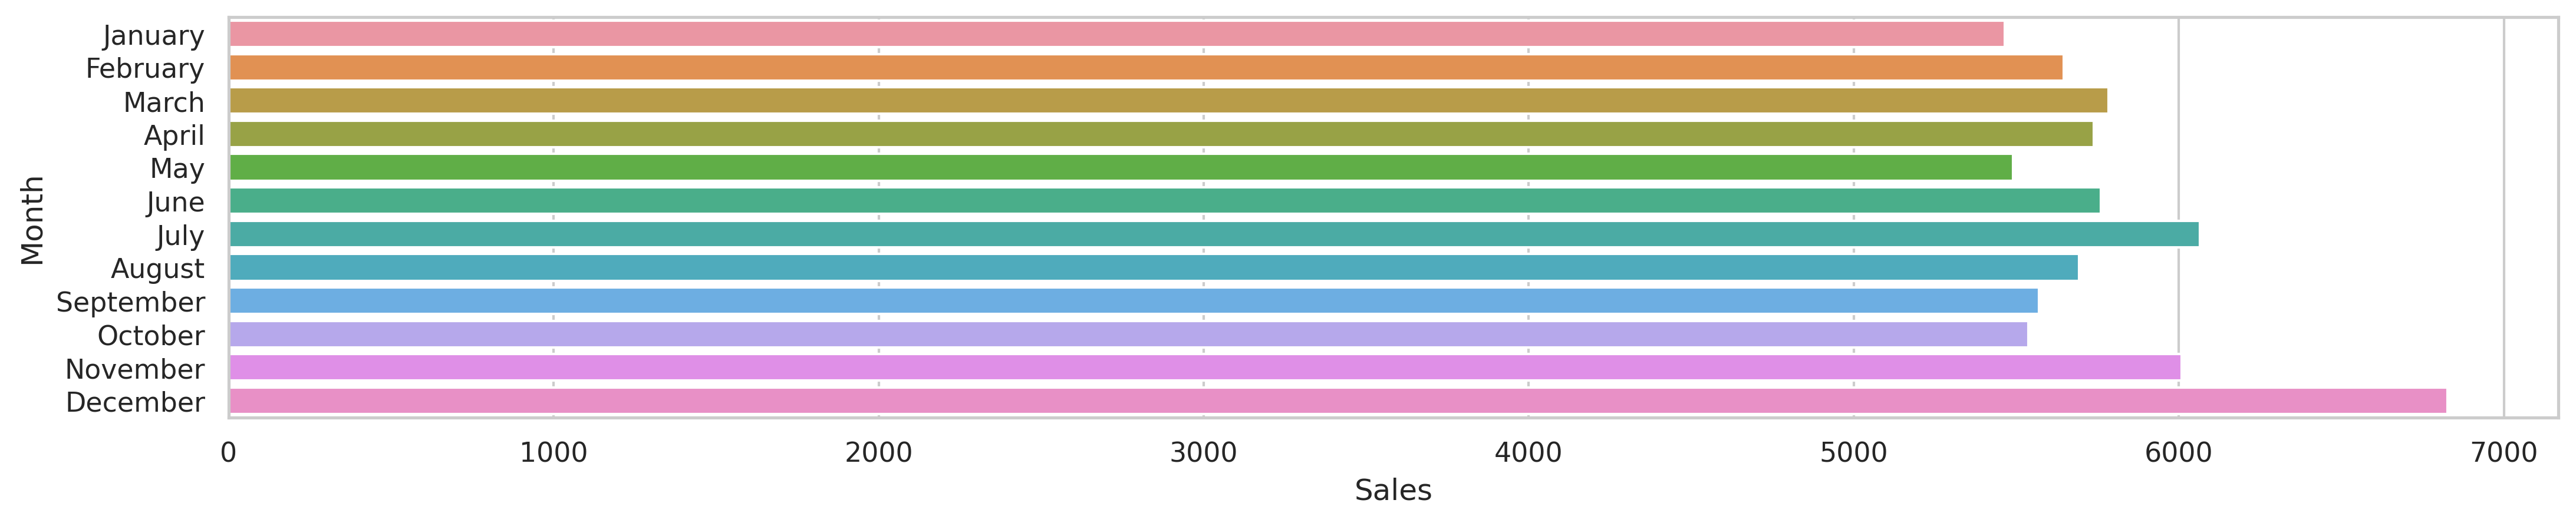

In [ ]:
rosemangrpms = df.groupby(['Month'],as_index= False)
rosemangrpms.groups
rosemangpms = rosemangrpms.agg({'Sales':np.mean})
rosemangpms
rosemangpms['Month'] =rosemangpms['Month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}).astype(str)
rosemangpms
sns.barplot(x='Sales',y='Month',data = rosemangpms)


#Our Observations on Rosemann Monthly Sales-
 We observe that the month of festival affects grately on the Sales.

In [ ]:
rosemangrpys = df.groupby(['Year'],as_index = False)
rosemangrpys.groups
rosemangpys = rosemangrpys.agg({'Sales':np.mean})
rosemangpys
sns.barplot(x='Year',y='Sales',data = rosemangpys)

# Our Observations on Roseman Store Yearly Sales Analysis 
- The sales status is almost constant throughout the years

# Analyzing the Problem Using Exponential Moving Averages (EMA)
- Since Roseman problem is a problem of continous sales data. Exponential Moving Averages are (EMA) is a best indicator to analyse

 A. Trend in a Data 
 - This means that sales data is in a uptrend or downtrend.

 B. Seasonality in a data
 - This means where sales figure increases in some speciific timeframes.

For ananlysing regression problems Exponential Moving Average (EMA) figures gives complete picure of data. By analysing this data we will be  able to understand whether continuing business is worthy and  also the  periods  when we will  get optimum benifits.

In [ ]:
rosemanall_weekly = df.groupby(['Year','week'],as_index = False)
rosemanall_weekly.groups
rosemanall_weekly = rosemanall_weekly.agg({'Sales':np.mean})
rosemanll_weekly = rosemanall_weekly.sort_values(by = ['Year','week'])
rosemanall_weekly['weekrow']= rosemanall_weekly.reset_index().index

rosemanall_weekly['10weeks_ema'] = rosemanall_weekly.Sales.ewm(span=10).mean()
rosemanall_weekly['50weeks_ema'] = rosemanall_weekly.Sales.ewm(span=50).mean()
rosemanall_weekly['200weeks_ema'] = rosemanall_weekly.Sales.ewm(span=200).mean()
rosemanall_weekly.plot('weekrow', ['10weeks_ema','50weeks_ema','200weeks_ema'])
plt.show()


# Store Type Wise Exponential Moving Average Analysis 
- While analysing database we observe that Roseman has four different types of stores. After analysing complete dataset, We now analyse Exponential Moving Average Analysis of Sales figures according to different Storetype analyzing   the behaviour of different store types 

In [ ]:
#6.2Moving Average Chart of Store Wise Sales Figure
rosemanall_a = df.loc[df['StoreType'] == 1]
rosemanall_b = df.loc[df['StoreType'] == 2]
rosemanall_c = df.loc[df['StoreType'] == 3]
rosemanall_d = df.loc[df['StoreType'] == 4]

In [ ]:
rosemanall_a_weekly = rosemanall_a.groupby(['Year','week'],as_index = False)
rosemanall_a_weekly.groups
rosemanall_a_weekly = rosemanall_a_weekly.agg({'Sales':np.mean})
rosemanll_weekly = rosemanall_a_weekly.sort_values(by = ['Year','week'])
rosemanall_a_weekly['weekrow']= rosemanall_a_weekly.reset_index().index

rosemanall_a_weekly['20days_ema'] = rosemanall_a_weekly.Sales.ewm(span=20).mean()
rosemanall_a_weekly['50days_ema'] = rosemanall_a_weekly.Sales.ewm(span=50).mean()
rosemanall_a_weekly['200days_ema'] = rosemanall_a_weekly.Sales.ewm(span=200).mean()

rosemanall_a_weekly.plot('weekrow',['20days_ema','50days_ema','200days_ema'])
plt.show()


In [ ]:
rosemanall_b_weekly = rosemanall_b.groupby(['Year','week'],as_index = False)
rosemanall_b_weekly.groups
rosemanall_b_weekly = rosemanall_b_weekly.agg({'Sales':np.mean})
rosemanll_weekly = rosemanall_b_weekly.sort_values(by = ['Year','week'])
rosemanall_b_weekly['weekrow']= rosemanall_b_weekly.reset_index().index

rosemanall_b_weekly['20days_ema'] = rosemanall_b_weekly.Sales.ewm(span=20).mean()
rosemanall_b_weekly['50days_ema'] = rosemanall_b_weekly.Sales.ewm(span=50).mean()
rosemanall_b_weekly['200days_ema'] = rosemanall_b_weekly.Sales.ewm(span=200).mean()

rosemanall_b_weekly.plot('weekrow',['20days_ema','50days_ema','200days_ema'])
plt.show()

In [ ]:
rosemanall_c_weekly = rosemanall_c.groupby(['Year','week'],as_index = False)
rosemanall_c_weekly.groups
rosemanall_c_weekly = rosemanall_c_weekly.agg({'Sales':np.mean})
rosemanll_weekly = rosemanall_c_weekly.sort_values(by = ['Year','week'])
rosemanall_c_weekly['weekrow']= rosemanall_c_weekly.reset_index().index
rosemanall_c_weekly['20days_ema'] = rosemanall_c_weekly.Sales.ewm(span=20).mean()
rosemanall_c_weekly['50days_ema'] = rosemanall_c_weekly.Sales.ewm(span=50).mean()
rosemanall_c_weekly['200days_ema'] = rosemanall_c_weekly.Sales.ewm(span=200).mean()

rosemanall_c_weekly.plot('weekrow',['20days_ema','50days_ema','200days_ema'])
plt.show()

In [ ]:
rosemanall_d_weekly = rosemanall_d.groupby(['Year','week'],as_index = False)
rosemanall_d_weekly.groups
rosemanall_d_weekly = rosemanall_d_weekly.agg({'Sales':np.mean})
rosemanll_weekly = rosemanall_d_weekly.sort_values(by = ['Year','week'])
rosemanall_d_weekly['weekrow']= rosemanall_d_weekly.reset_index().index
rosemanall_d_weekly['20days_ema'] = rosemanall_d_weekly.Sales.ewm(span=20).mean()
rosemanall_d_weekly['50days_ema'] = rosemanall_d_weekly.Sales.ewm(span=50).mean()
rosemanall_d_weekly['200days_ema'] = rosemanall_d_weekly.Sales.ewm(span=200).mean()

rosemanall_d_weekly.plot('weekrow',['20days_ema','50days_ema','200days_ema'])
plt.show()

# Our Observations and Conclusions after analysis of Roseman Storetype wise Exponential Moving Average Charts


STORETYPE A - While analysing Exponential Moving Average Chart of Store Type A we observe that -Store type A sales figure is slightly uptrend 20 days EMA never crosses 200 days EMA. -We observe seasonality in EMA chart and found sales of Storetype A sharply increase at Week 50 and week 105.

STORETYPE B - While analysing Exponential Moving Average Chart of Store Type B we observe that

Storetype B Sales figures are in strong uptrend and 20 days EMA never crosses 50 days EMA sales chart of Storetype B is very strong.
Although this chart is very strong we observe seasonality in upward seasonality at week 50 and week 105.
STORETYPE C - While analysing Exponential Moving Average Chart of Store Type C we observe that -Store type A sales figure is slightly uptrend 20 days EMA never crosses 200 days EMA. -We observe seasonality in EMA chart and found sales of Storetype A sharply increase at Week 50 and week 105.

STORETYPE D - While analysing Exponential Moving Average Chart of Store Type D we observe that

Storetype D sales chart is in uptrend and better chart than Storetype A and C. In this EMA chart we observe that support of 20 days EMA at 50 days EMA and most of time 20 days EMA line not cuts downward 20 days EMA line.
After analysing all the EMA charts store wise we observe following out of all the store type Roseman has to focus aggresively on opening new Storetype B and D and focus on closure of Storetype A and C.Exponential Moving Average Analysis is a part of Time Series Analysis and Roseman problem is a time series analysis problem our conclusion is that EMA chart analysis gives us very indepth understanding of Roseman sales.

# Evaluation using Random Forest Regressor Model
- Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees.[1][2] Random decision forests correct for decision trees' habit of overfitting to their training set.[3]:587–588 Random forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

RF = RandomForestRegressor(max_depth =5)



RF.fit(X_train,Y_train)
 
y_predict_rf = RF.predict(X_test)

In [ ]:
score_rf = r2_score(y_predict_rf,Y_test)
score_rf

In [ ]:
#10.1 Prediction of Roseman Problem using XGBoost Algorithm

from xgboost.sklearn import XGBRegressor

xgb = XGBRegressor()


#10.2 Doing Grid Search using XG Boost
xgb.get_params

parameters = {
               'xg__learning_rate':  [0.03, 0.05],
                'xg__n_estimators':   [200,  300], 
                'xg__max_depth':      [4,6]
            }


clf = GridSearchCV(estimator = pipeline_xg,param_grid= parameters,scoring="neg_mean_squared_error",cv=4,verbose=1)
                   